In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
m = 100
x = 6 * np.random.rand(m, 1) -3
y = .5 * x**2 + x + 2 + np.random.randn(m, 1) *.8

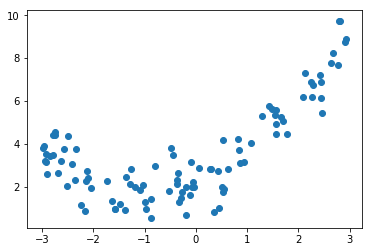

In [4]:
plt.scatter(x, y)

In [5]:
#  2 degree = [x, x**2, 1]
x_n = np.c_[x, x**2, np.ones(x.shape[0])]
#  8 degree = [x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, 1]

def polynom(m, deg):
    nm = np.zeros((m.shape[0], deg+1))
    for j in range(0, deg+1):
        for i in range(0, m.shape[0]):
            nm[i][j] = m[i]**j
    return nm

four = polynom(x, 2)
eight = polynom(x, 8)
print(x[0])
print(four[0])

x_n_eight = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, np.ones(x.shape[0])]

print(eight[0].ravel())

[ 1.77466113]
[ 1.          1.77466113  3.14942214]
[  1.           1.77466113   3.14942214   5.58915705   9.91885979
  17.60261494  31.23867656  55.43806513  98.38377944]


In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=8, include_bias=False)
X_poly = poly_features.fit_transform(x)
print(X_poly[0])
print(x_n_eight[0])

[  1.77466113   3.14942214   5.58915705   9.91885979  17.60261494
  31.23867656  55.43806513  98.38377944]
[  1.77466113   3.14942214   5.58915705   9.91885979  17.60261494
  31.23867656  55.43806513  98.38377944   1.        ]


In [7]:
theta = np.random.rand(eight.shape[1], 1)

eta = 0.01
n_epoch = 50
m = len(eight)
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

steps = 0

for epoch in range(n_epoch):
    for n in range(m):
        rand = np.random.randint(0,m-1)
        xi, yi = eight[rand:rand+1], y[rand:rand+1]
        grad = xi.T @ ((xi @ theta) - yi)
        eta = learning_schedule(epoch * m + n)
        theta = theta - eta*grad
        steps +=1
    
# print(f'steps: {steps}\n')

print(f'theta: {theta}\n')

# print(theta_b)

theta: [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]



/Users/kkgh070/anaconda3/envs/porto/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in subtract


In [378]:
theta_b = np.linalg.inv(eight.T @ eight) @ eight.T @ y
theta_b

array([[ 2.23692458],
       [ 1.30540741],
       [-0.1867548 ],
       [-0.51191217],
       [ 0.37375552],
       [ 0.14771251],
       [-0.05953323],
       [-0.01138658],
       [ 0.00265621]])

In [1]:
batch_size = 1
theta = np.random.rand(four.shape[1], 1)

# print(theta)

eta = .1
n_epoch = 50
m = len(four)
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

def gradient_descent(X, y, n_epoch, eta):
    theta = np.random.rand(X.shape[1], 1)
    for epoch in range(n_epoch):
        for n in range(len(X)):
            rand = np.random.randint(0,m-1)
            xi, yi = X[rand:rand+1], y[rand:rand+1]
            grad = xi.T @ ((xi @ theta) - yi)
            eta = learning_schedule(epoch * m + n)
            theta = theta - grad * eta
    return theta

steps = 0

theta = gradient_descent(eight, y, 50, 0.1)

# for epoch in range(n_epoch):
#     for n in range(m):
#         rand = np.random.randint(0,m-1)
#         xi, yi = four[rand:rand+1], y[rand:rand+1]
#         grad = xi.T @ ((xi @ theta) - yi)
#         eta = learning_schedule(epoch * m + n)
#         theta = theta - grad * eta
#         steps +=1
    
# print(f'steps: {steps}\n')

print(f'theta: {theta}\n')

# print(theta_b)

NameError: name 'np' is not defined

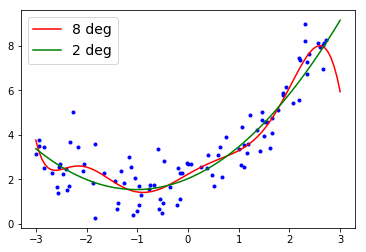

In [379]:
plt.plot(x, y, 'b.')
t = np.linspace(-3, 3, 100).reshape(100, 1)

# Need to add intercespt point

plt.plot(t, polynom(t, 8) @ theta_b, 'r-', label='8 deg')
plt.plot(t, polynom(t, 2) @ theta, 'g-', label='2 deg')
plt.legend(loc="upper left", fontsize=14)
plt.show()

/Users/kkgh070/anaconda3/envs/porto/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


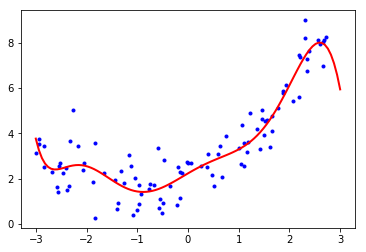

In [381]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()
lin_reg.fit(eight, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(polynom(X_new, 8))
plt.plot(x, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.show()